# Predict Income

## 📝 Project Description

## 📋 Features Dictionary

| Column           | Dtype   | Description                      |
|------------------|---------|----------------------------------|
| age              | int64   | Individual's age in years.       |
| workclass        | object  | Type of employment.              |
| fnlwgt           | int64   | Final weight for the record.     |
| education        | object  | Highest level of education.      |
| educational-num  | int64   | Numeric representation of education. |
| marital-status   | object  | Marital status of the individual.|
| occupation       | object  | Type of job or role.             |
| relationship     | object  | Relationship within the family.  |
| race             | object  | Racial category of the individual. |
| gender           | object  | Gender of the individual.        |
| capital-gain     | int64   | Income from investment gains.    |
| capital-loss     | int64   | Losses from investments.         |
| hours-per-week   | int64   | Weekly working hours.            |
| native-country   | object  | Country of origin.               |
| income           | object  | Income level category.           |


# Load & Inspect Data 🔍

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import explore_numeric, explore_categorical, evaluate_classification, plot_importance, plot_categorical_vs_target, plot_numeric_vs_target, plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(transform_output='pandas')

heatmap_cmap= "Blues"
SEED= 42

pd.set_option('display.max_columns', None)

import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [2]:
path= '../project/data/adult.csv'

df= pd.read_csv(path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning 🧼

## 🗐 Duplicate Values

In [3]:
df.duplicated().sum()

52

In [4]:
duplicated_rows= df.duplicated(keep= False)
df[duplicated_rows].sort_values(by= 'fnlwgt')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
41905,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45127,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
38156,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
24201,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
33127,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


`Since all the duplicated rows represent the same person, we only need to keep one. `

In [5]:
df= df.drop_duplicates(keep= 'first')
df.duplicated().sum()

0

## ❌ Inconsistencies Categorical Values

In [6]:
cat_cols= df.select_dtypes(include= 'object')

for col in cat_cols:
    print(df[col].value_counts())
    print('_'*20)

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
____________________
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64
____________________
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64
____________________
occupation
Prof-speci

`There are no inconsistent values.`

## 🗂️ Coulmns Data Types

`There are no categorical columns that need to be transferred to numeric.`

## ⚠️ Missing Values

In [7]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

`There are no missing values; there is no need to use the simple imputer in the preprocessing step.`

## ❗Unusual Data Points

In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
help(explore_numeric)

Help on function explore_numeric in module helper_functions:

explore_numeric(df, x, figsize=(8, 5))



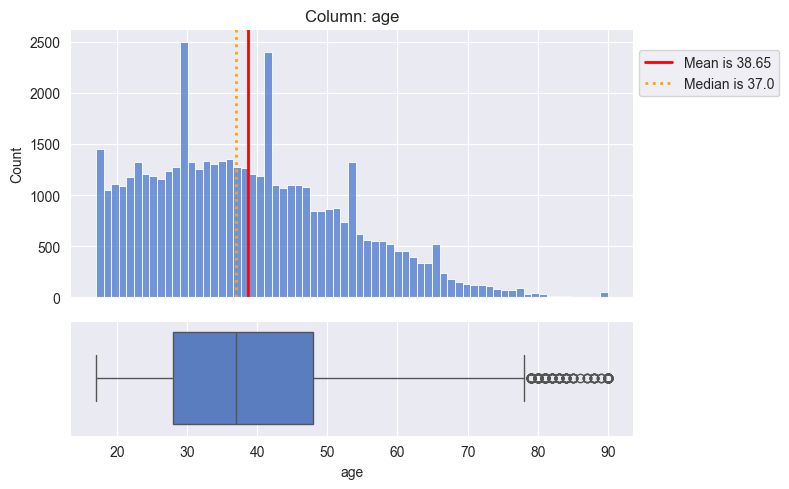

- NaN's Found: 0 (0.0%)
- Most common value: '36' occurs 1348 times (2.76%)
- Not constant or quasi-constant.


In [10]:
explore_numeric(df, x= 'age');

- Based on the box plot, it looks like we have multiple `outliers` from the `range of 80 to 90`, but are they really!
- I'll `not remove` these data points as the age is `reasonable`, and they just represented the minority in this dataset.

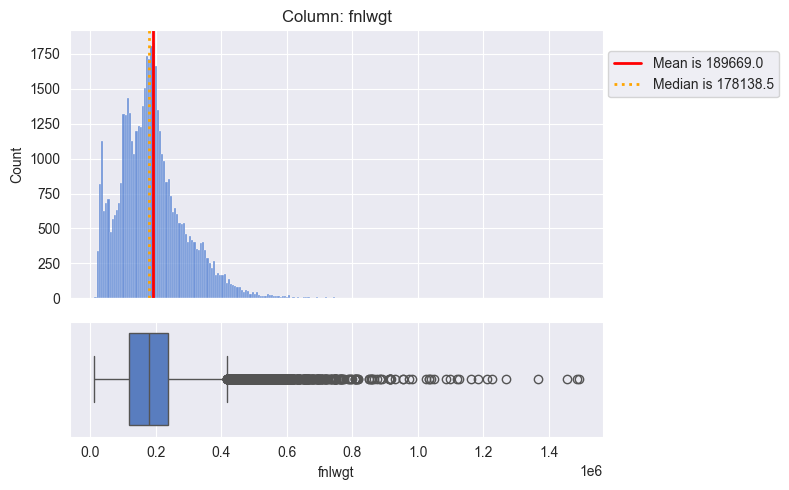

- NaN's Found: 0 (0.0%)
- Most common value: '203488' occurs 21 times (0.04%)
- Not constant or quasi-constant.


In [11]:
explore_numeric(df, x='fnlwgt');

- Since this feature represents a weight, and it looks like most of the weights are between `0 - 0.4` and there are some `outliers` that are `above 0.4`, that causes the histogram to be `right-skewed`.
- There are `no strong arguments` to delete these outliers, so I'll `keep` these data points since they mostly represent a minority.

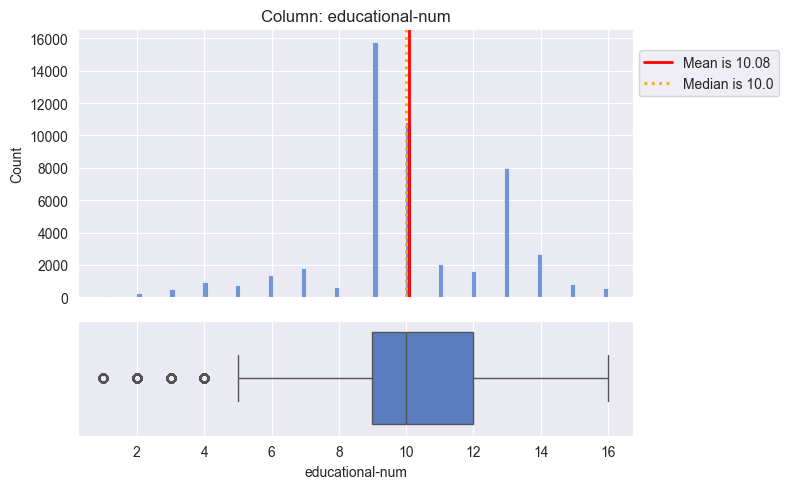

- NaN's Found: 0 (0.0%)
- Most common value: '9' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [12]:
explore_numeric(df, x= 'educational-num');

- This feature represents the `education level` of the person, and we can see that there is some `minority` that they only graduated from the first grades, and they didn't finish school.
- No reason to remove these data points.

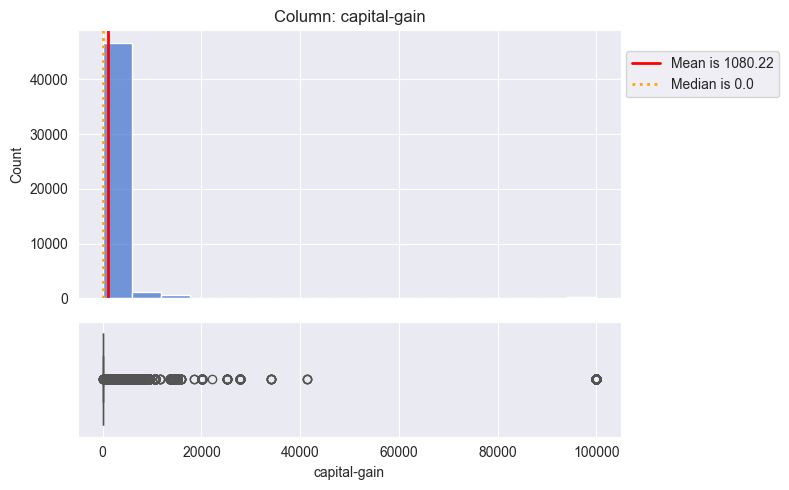

- NaN's Found: 0 (0.0%)
- Most common value: '0' occurs 44755 times (91.73%)
- Not constant or quasi-constant.


In [13]:
explore_numeric(df, x= 'capital-gain');

- It looks like it is not common to make income from investment; that is why it `appears` like we have `multiple outliers`.
- But there are `no strong arguments to remove` these outliers, as it looks like they are smart people and invested their money right.

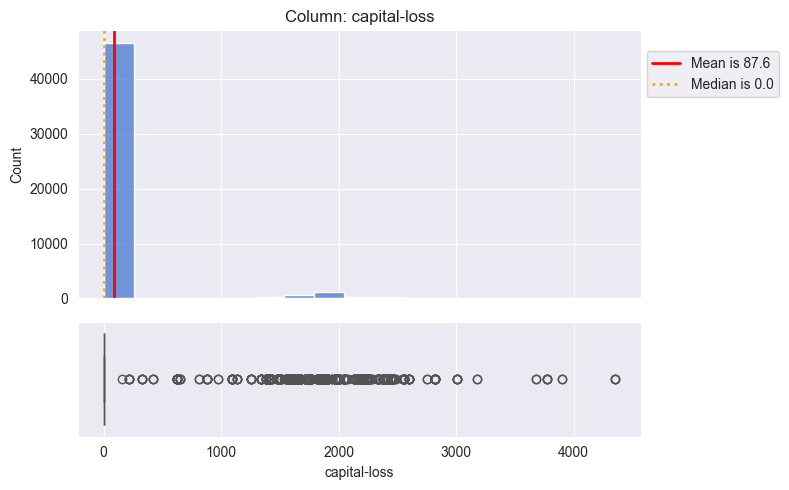

- NaN's Found: 0 (0.0%)
- Most common value: '0' occurs 46508 times (95.32%)
- Not constant or quasi-constant.


In [14]:
explore_numeric(df, x= 'capital-loss');

- Well, it is the same case, it is not common to `invest`; that's why there are `outliers`, so I'll leave them and will not remove them.

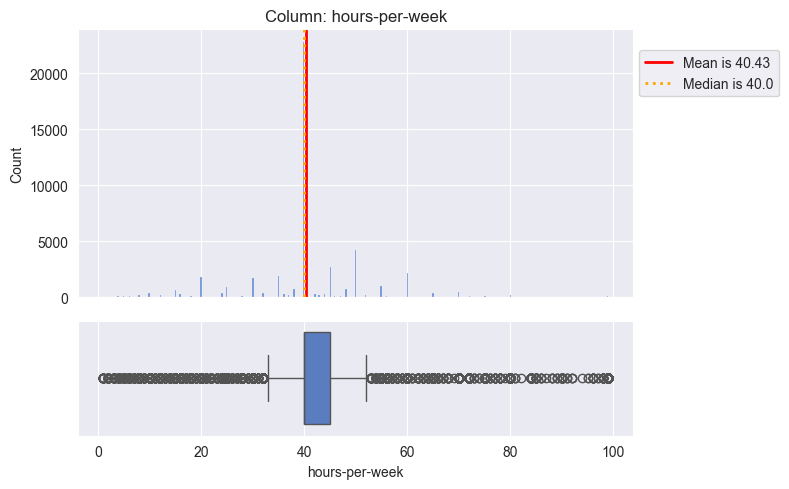

- NaN's Found: 0 (0.0%)
- Most common value: '40' occurs 22773 times (46.68%)
- Not constant or quasi-constant.


In [15]:
explore_numeric(df, x= 'hours-per-week');

- It looks like the median is around 40 hours.
- The people who work less than 40 or 30 hours maybe they are working part-time.
- The people that are working a lot of hours weekly may be they are from third world countries.
- No reason to remove any datapoint

In [16]:
df.describe(include= ['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


## 🆔 Set Index

In [17]:
df['fnlwgt'].nunique()

28523

In [18]:
df.shape

(48790, 15)

`Well, there is no other unique identifier, so I'll leave the index as it is.`

## ⚖️ Check Balance

In [19]:
df['income'].value_counts(normalize= True)

income
<=50K    0.760586
>50K     0.239414
Name: proportion, dtype: float64

`The data is unbalanced; we need to make it balanced in the preprocessing step, but for now I'll do some visualization first.`

# Feature Inspection 👀

## 📊 Univariate Exploratory Visualizations

`Since we explored all the numeric features in the unusual data points part, let us now explore the categorical features.`

In [20]:
help(explore_categorical)

Help on function explore_categorical in module helper_functions:

explore_categorical(df, x, hue, fillna=True, placeholder='MISSING', figsize=(6, 4), order=None)



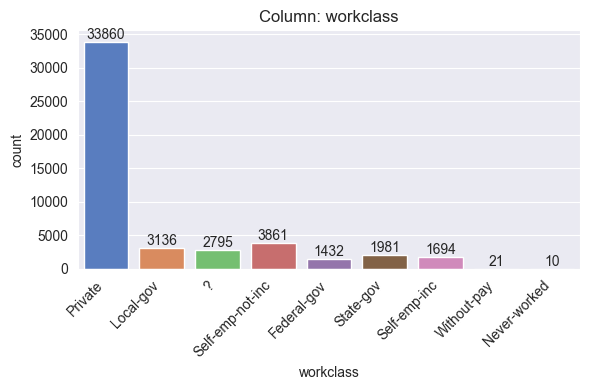

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: 'Private' occurs 33860 times (69.4%)
- Not constant or quasi-constant.


In [21]:
explore_categorical(df, x= 'workclass', hue= 'workclass');

`It is very clear that most of the people in this data set get their income from the private sector.`

In [22]:
df.describe(include= ['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [23]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [24]:
order_education= ['Preschool','1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Assoc-voc', 'Assoc-acdm', 'Some-college', 'Bachelors', 'Prof-school', 'Masters', 'Doctorate']

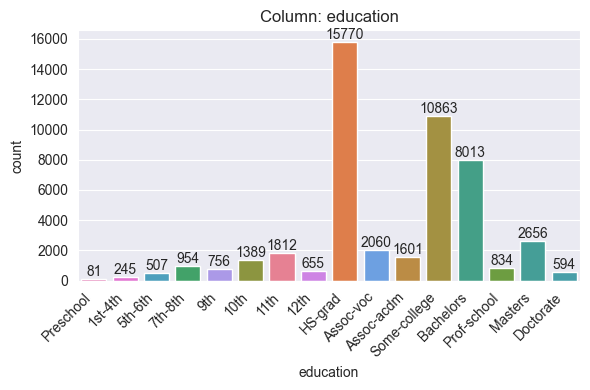

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [25]:
explore_categorical(df, x= 'education', hue= 'education', order= order_education);

`We can see most of the people in the data are high school graduates, then college dropouts, meaning they took some courses in college but didn't finish, and we also have high bachelor graduates.`

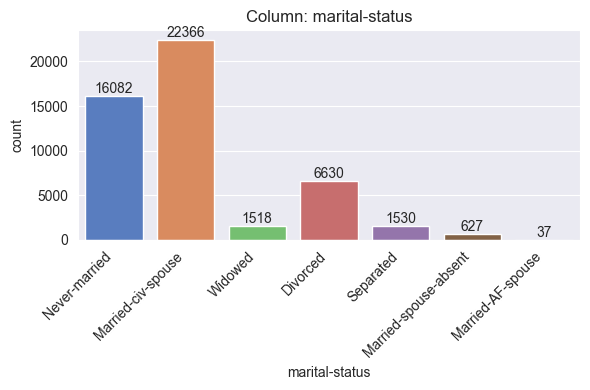

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 22366 times (45.84%)
- Not constant or quasi-constant.


In [26]:
explore_categorical(df, x= 'marital-status', hue= 'marital-status');

`We can see the highest category is married to a civilian spouse, then never married.`

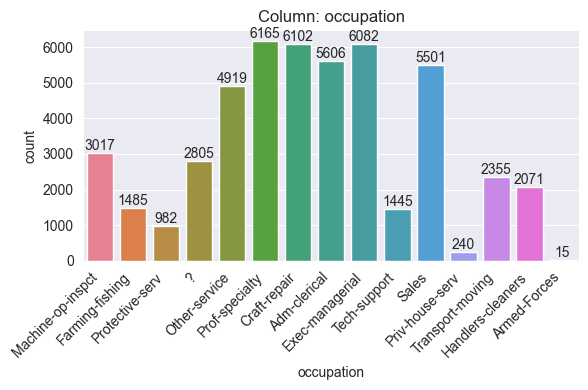

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6165 times (12.64%)
- Not constant or quasi-constant.


In [27]:
explore_categorical(df, x= 'occupation', hue= 'occupation');

`We can see that the counts are diverse and close to each other, with no dominant value.`

- **Prof-specialty:** Professional specialty jobs (e.g., doctors, engineers).
- **Craft-repair:** Skilled trades like electricians or mechanics.
- **Exec-managerial:** Executive or managerial roles.
- **Adm-clerical:** Administrative or clerical work (e.g., secretaries).
- **Sales:** Sales-related occupations (e.g., retail, real estate).
- **Other-service:** Miscellaneous service roles (e.g., cleaners, personal care).
- **Machine-op-inspct:** Machine operators or inspectors.
- **?:** Missing or unknown occupation.
- **Transport-moving:** Transportation and moving jobs (e.g., drivers).
- **Handlers-cleaners:** Manual labor like warehouse workers or janitors.
- **Farming-fishing:** Agricultural or fishing-related jobs.
- **Tech-support:** Technical support roles (e.g., IT support).
- **Protective-serv:** Protective services (e.g., police, security).
- **Priv-house-serv:** Private household services (e.g., nannies, housekeepers).
- **Armed-Forces:** Members of the military.

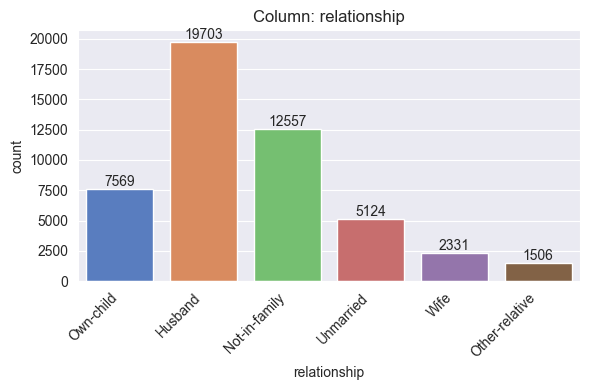

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19703 times (40.38%)
- Not constant or quasi-constant.


In [28]:
explore_categorical(df, x= 'relationship', hue= 'relationship');

`We can see that Husband value is the dominant one, with 40.38% occurrence.`

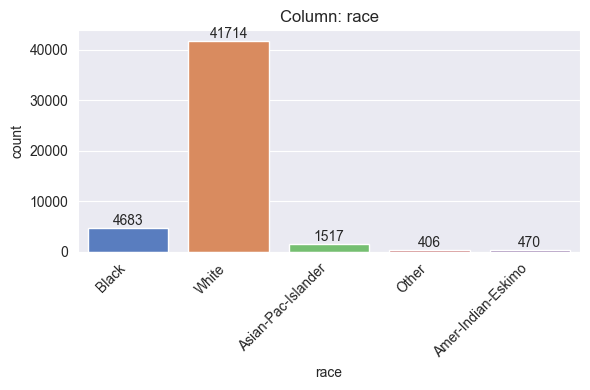

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 41714 times (85.5%)
- Not constant or quasi-constant.


In [29]:
explore_categorical(df, x= 'race', hue= 'race');

`We can see that White value is the dominant one, with 85.5% occurrence.`

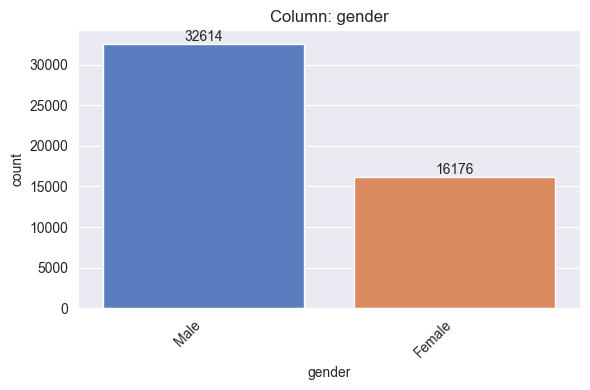

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 32614 times (66.85%)
- Not constant or quasi-constant.


In [30]:
explore_categorical(df, x= 'gender', hue= 'gender');

`We can see that the majority of this data are males.`

In [31]:
df['native-country'].nunique()

42

In [32]:
df['native-country'].value_counts(normalize= True).round(4) * 100

native-country
United-States                 89.76
Mexico                         1.93
?                              1.75
Philippines                    0.60
Germany                        0.42
Puerto-Rico                    0.38
Canada                         0.37
El-Salvador                    0.32
India                          0.31
Cuba                           0.28
England                        0.26
China                          0.25
South                          0.24
Jamaica                        0.22
Italy                          0.22
Dominican-Republic             0.21
Japan                          0.19
Poland                         0.18
Guatemala                      0.18
Vietnam                        0.18
Columbia                       0.17
Haiti                          0.15
Portugal                       0.14
Taiwan                         0.13
Iran                           0.12
Greece                         0.10
Nicaragua                      0.10
Peru         

`We have 42 unique values, which will be difficult to visualize on the plot, but based on the value counts, we can see that the United States has the majority with 89.76%`

## 🔥Correlation Heatmap

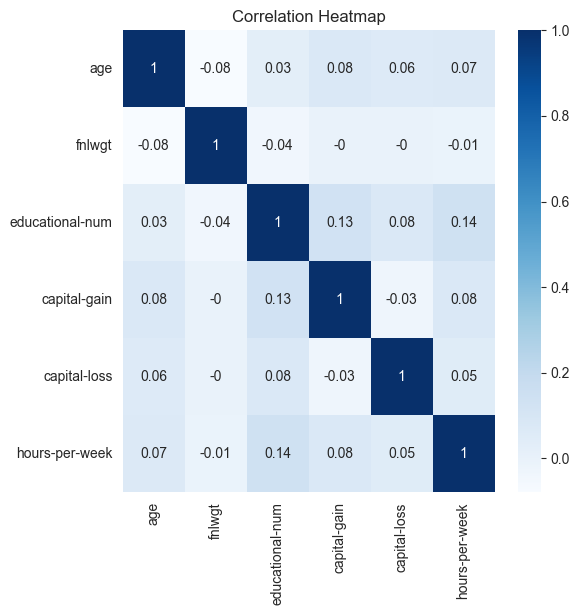

In [33]:
corr= df.corr(numeric_only= True).round(2)

fig, ax= plt.subplots(figsize= (6,6))
ax.set_title('Correlation Heatmap')
ax= sns.heatmap(corr, annot= True, cmap= heatmap_cmap)

- It looks like there is `no high multicollinearity` between the features, and that is good.

# Modeling 🧠

### ⏮️ Preprocessing

In [34]:
X= df.drop(columns= 'income')
y= df['income']

X.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States


In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= SEED)

In [36]:
numeric_cols= X_train.select_dtypes(include= 'number').columns
ordinal_cols= ['education']
nominal_cols= X_train.select_dtypes(include= 'object').drop(columns= ordinal_cols).columns

In [37]:
numeric_scaler= StandardScaler()
numeric_tuple= ('Numerical', numeric_scaler, numeric_cols)

In [38]:
ordinal_encoder= OrdinalEncoder(categories= [order_education])
ordinal_scaler= StandardScaler()

ordinal_pipe= make_pipeline(ordinal_encoder, ordinal_scaler)
ordinal_tuple= ('Ordinal', ordinal_pipe, ordinal_cols)

In [39]:
nominal_encoder= OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

nominal_tuple= ('Noiminal', nominal_encoder, nominal_cols)

In [40]:
preprocessor= ColumnTransformer([numeric_tuple, ordinal_tuple, nominal_tuple], verbose_feature_names_out= False)
preprocessor

ColumnTransformer(transformers=[('Numerical', StandardScaler(),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th',
                                                                              '5th-6th',
                                                                              '7th-8th',
                                                                              '9th',
                                                                              '10th',
                                                                              '11th',
                                                                              '12th',
                                                                              'HS-grad',
                                                                              'Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Some-college',
                                                                              'Bachelors',
                                                                              'Prof-school',
                                                                              'Masters',
                                                                              'Doctorate']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['education']),
                                ('Noiminal',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### 🌳 Random Forest Classifier

In [41]:
random_forest= RandomForestClassifier(random_state= SEED)
random_forest_pipe = make_pipeline(preprocessor, random_forest)
random_forest_model= random_forest_pipe.fit(X_train, y_train)

In [42]:
help(evaluate_classification)

Help on function evaluate_classification in module helper_functions:

evaluate_classification(model, X_train, y_train, X_test, y_test, figsize=(6, 4), normalize='true', output_dict=False, cmap_train='Blues', cmap_test='Reds', colorbar=False)



----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



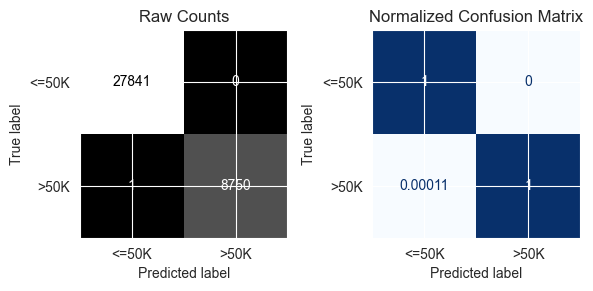


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9268
        >50K       0.75      0.62      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.78      0.79     12198
weighted avg       0.85      0.86      0.85     12198



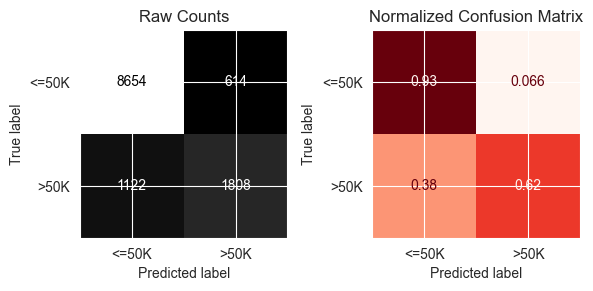

In [43]:
evaluate_classification(random_forest_model, X_train, y_train, X_test, y_test)

`We can see that clearly the model is overfit; I'll try to improve it by tuning the hyperparameters.`

### 🎼 Cross-Validation & Parameter Tuning Using GridSearchCV

In [44]:
random_forest.get_params()

# params = {'randomforestclassifier__max_depth': [None,10,15,20],
#           'randomforestclassifier__n_estimators':[10,100,150,200],
#           'randomforestclassifier__min_samples_leaf':[2,3,4],
#           'randomforestclassifier__max_features':['sqrt','log2',None],
#           'randomforestclassifier__oob_score':[True,False],
#         }

params= {'randomforestclassifier__max_depth': [None],
        'randomforestclassifier__max_features': [None],
        'randomforestclassifier__min_samples_leaf': [3],
        'randomforestclassifier__n_estimators': [100],
        'randomforestclassifier__oob_score': [True],
        }

In [45]:
random_forest= RandomForestClassifier(random_state= SEED)
random_forest_pipe= make_pipeline(preprocessor, random_forest)

random_forest_gridsearch= GridSearchCV(random_forest_pipe, params, n_jobs=-1, cv=2, verbose=1)

random_forest_gridsearch.fit(X_train, y_train)
random_forest_gridsearch.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.96      0.99      0.97     27841
        >50K       0.96      0.86      0.91      8751

    accuracy                           0.96     36592
   macro avg       0.96      0.92      0.94     36592
weighted avg       0.96      0.96      0.96     36592



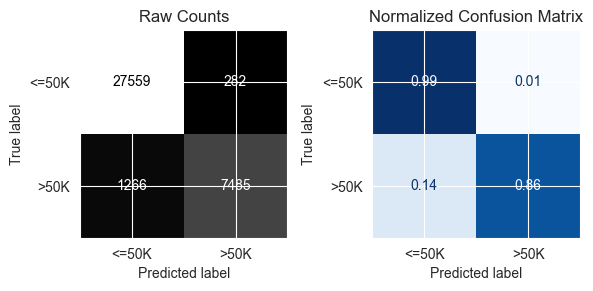


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      9268
        >50K       0.77      0.62      0.69      2930

    accuracy                           0.87     12198
   macro avg       0.83      0.78      0.80     12198
weighted avg       0.86      0.87      0.86     12198



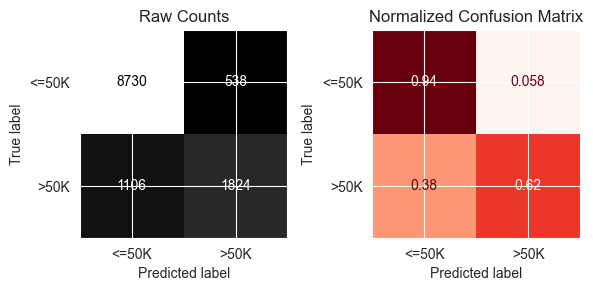

In [46]:
best_random_forest_model= random_forest_gridsearch.best_estimator_
evaluate_classification(best_random_forest_model, X_train, y_train, X_test, y_test)

`We can see slight enhancement, but if We look to the F1 macro avg; we still can see a variance between the training score and testing score.`

### 🏆 Permutation Importance

In [47]:
r = permutation_importance(best_random_forest_model, X_test, y_test, n_repeats= 5, random_state= SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [48]:
permutation_importances = pd.Series(r['importances_mean'],index= X_test.columns, name= 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending= False)
permutation_importances

marital-status     0.061108
capital-gain       0.044302
age                0.020561
capital-loss       0.015576
occupation         0.014970
educational-num    0.012297
hours-per-week     0.009788
workclass          0.004689
education          0.001607
fnlwgt             0.001590
relationship       0.000836
gender             0.000361
native-country     0.000262
race              -0.000180
Name: permutation importance, dtype: float64

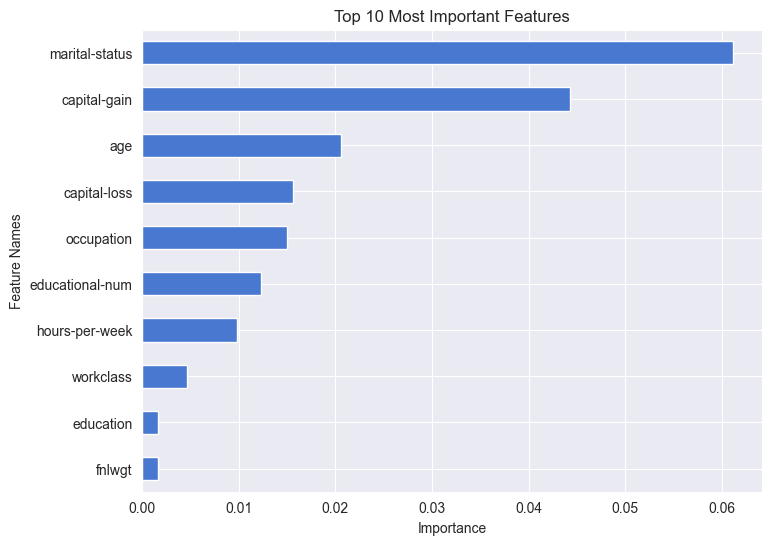

In [49]:
plot_importance(permutation_importances, top_n=10);

- From the plot above, we can see clearly that `marital-status` is the most important feature, followed by `capital-gain` and `age`.
- I think this order makes sense since they have a real and `direct` impact on the `income`.

###  📈 Multivariate Exploratory Visualizations

In [50]:
help(plot_categorical_vs_target)

Help on function plot_categorical_vs_target in module helper_functions:

plot_categorical_vs_target(df, x, y, figsize=(8, 4), fillna=True, placeholder='MISSING', order=None, target_type='reg')



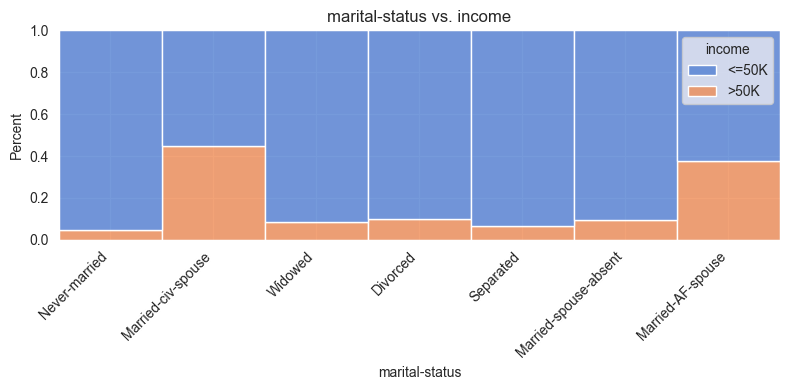

In [51]:
plot_categorical_vs_target(df, x= 'marital-status', y= 'income', target_type= 'class');

- Based on the feature importance result and the plot above, it is clear that the target is significantly impacted by the `marital-status`.
- That makes sense since `married people` will have `more responsibilities`, and that will lead them to work harder and `increase their income`, and that is the case that we got from the plot.

In [52]:
help(plot_numeric_vs_target)

Help on function plot_numeric_vs_target in module helper_functions:

plot_numeric_vs_target(df, x, y, figsize=(6, 4), target_type='reg', estimator='mean', errorbar='ci', sorted=False, ascending=False, **kwargs)



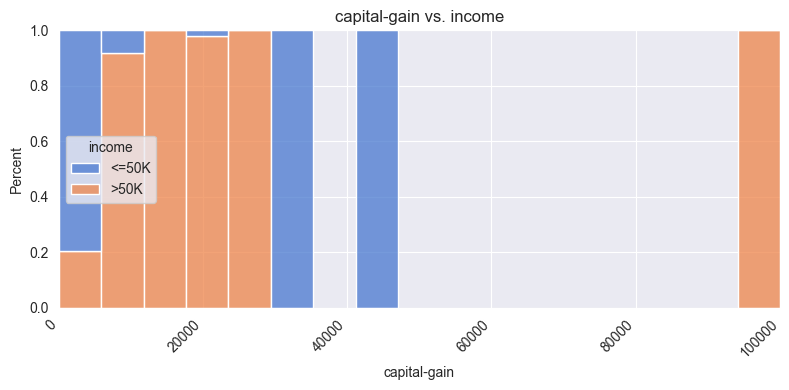

In [53]:
plot_categorical_vs_target(df, x= 'capital-gain', y= 'income', target_type= 'class');

- We can see that `higher capital-gain` values are associated with `higher incomes`.
- In the middle bars of the chart, we observe that some individuals earning `<=50K`, this is unusual because `capital-gain` are typically associated with higher income levels.
- This highlights that `capital-gain` alone `don't` always correlate perfectly with higher income brackets and that `other factors` also play a role in total income classification.

# Feature Engineering ⚙️

### 🌳 Random Forest with PCA

In [54]:
pca = PCA(n_components= 3)

random_forest= RandomForestClassifier(random_state= SEED)
rf_pipe_pca= make_pipeline(preprocessor, pca, random_forest)

rf_gridsearch_pca= GridSearchCV(rf_pipe_pca, params, n_jobs=-1, cv=2, verbose=1)

rf_gridsearch_pca.fit(X_train, y_train)
rf_gridsearch_pca.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.95      0.99      0.97     27841
        >50K       0.96      0.84      0.90      8751

    accuracy                           0.95     36592
   macro avg       0.96      0.91      0.93     36592
weighted avg       0.95      0.95      0.95     36592



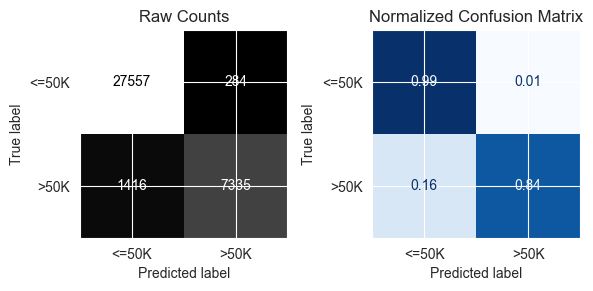


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88      9268
        >50K       0.65      0.48      0.55      2930

    accuracy                           0.81     12198
   macro avg       0.75      0.70      0.72     12198
weighted avg       0.80      0.81      0.80     12198



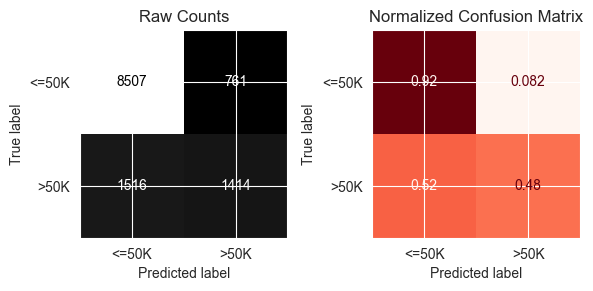

In [55]:
best_rf_pca_model= rf_gridsearch_pca.best_estimator_
evaluate_classification(best_rf_pca_model, X_train, y_train, X_test, y_test)

`We can see that the F1 macro avg reduced compared to the tuned model.`

### ⤵️ ROC Curve Comparison

In [56]:
y_test_num = y_test.map({'<=50K': 0, '>50K': 1})

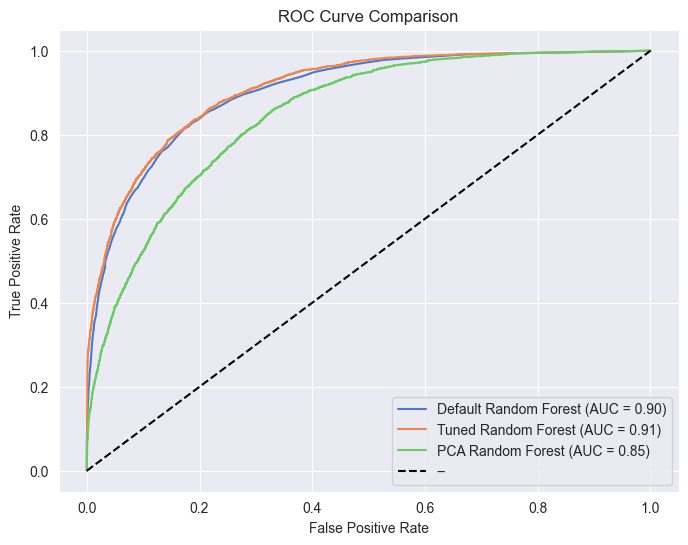

In [57]:
models = {'Default Random Forest': random_forest_model, 'Tuned Random Forest': best_random_forest_model, 'PCA Random Forest': best_rf_pca_model}

plot_roc_curve(models, X_test, y_test_num)

- From the curve above we can see that the `tuned model` has the `best AUC` result, as when using the `PCA` and reducing the component to only 3, it `affected the AUC` and made it decrease.

### 🧩 KMeans

In [58]:
X_train_transformed= preprocessor.fit_transform(X_train)
X_test_transformed= preprocessor.transform(X_test)

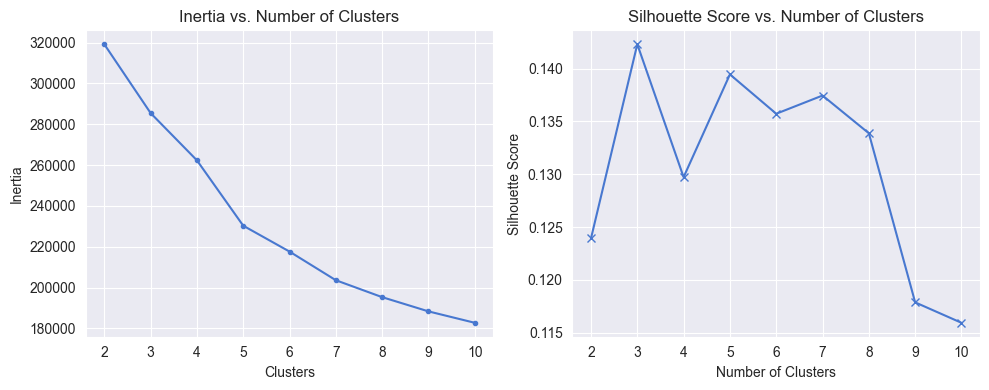

In [59]:
inertias = []
silhouette_scores = []

#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters= k, n_init= 'auto', random_state= SEED)  
    kmeans.fit(X_train_transformed)  
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_transformed, kmeans.labels_))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the inertia scores
ax[0].plot(range(2, 11), inertias, marker='.')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Inertia vs. Number of Clusters')

# Plot the silhouette scores
ax[1].plot(range(2, 11), silhouette_scores, marker='x')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score vs. Number of Clusters')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [60]:
kmeans = KMeans(n_clusters= 4, random_state= SEED)  

cluster_labels_train = kmeans.fit_predict(X_train_transformed)  
cluster_labels_test = kmeans.predict(X_test_transformed)

In [61]:
X_train['cluster']= cluster_labels_train
X_test['cluster']= cluster_labels_test 

X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,cluster
38093,82,?,194590,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,8,United-States,0
43391,30,State-gov,48214,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,1
3064,28,Private,340269,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3137,0,45,United-States,3
45606,20,?,133515,Some-college,10,Never-married,?,Own-child,White,Female,0,0,15,France,3
2116,39,Private,67433,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [62]:
pca = PCA(n_components= .85)

random_forest_cluster= RandomForestClassifier(random_state= SEED)
rf_pipe_cluster= make_pipeline(preprocessor, pca, random_forest_cluster)

rf_gridsearch_cluster= GridSearchCV(rf_pipe_cluster, params, n_jobs=-1, cv=2, verbose=1)

rf_gridsearch_cluster.fit(X_train, y_train)
rf_gridsearch_cluster.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.98      1.00      0.99     27841
        >50K       0.98      0.92      0.95      8751

    accuracy                           0.98     36592
   macro avg       0.98      0.96      0.97     36592
weighted avg       0.98      0.98      0.98     36592



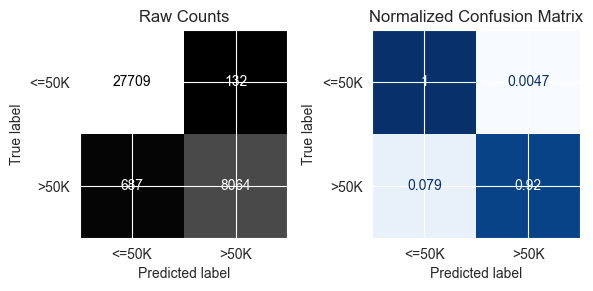


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      9268
        >50K       0.73      0.58      0.65      2930

    accuracy                           0.85     12198
   macro avg       0.80      0.76      0.77     12198
weighted avg       0.84      0.85      0.84     12198



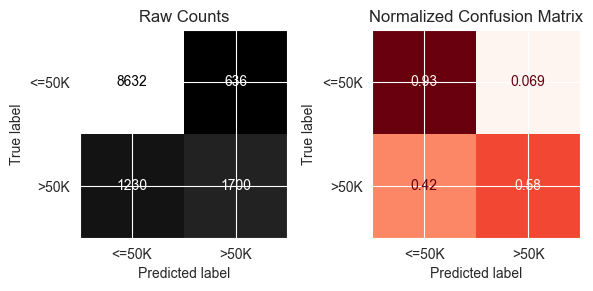

In [63]:
best_rf_cluster_model= rf_gridsearch_cluster.best_estimator_
evaluate_classification(best_rf_cluster_model, X_train, y_train, X_test, y_test)

### ⤵️ ROC Curve Comparison

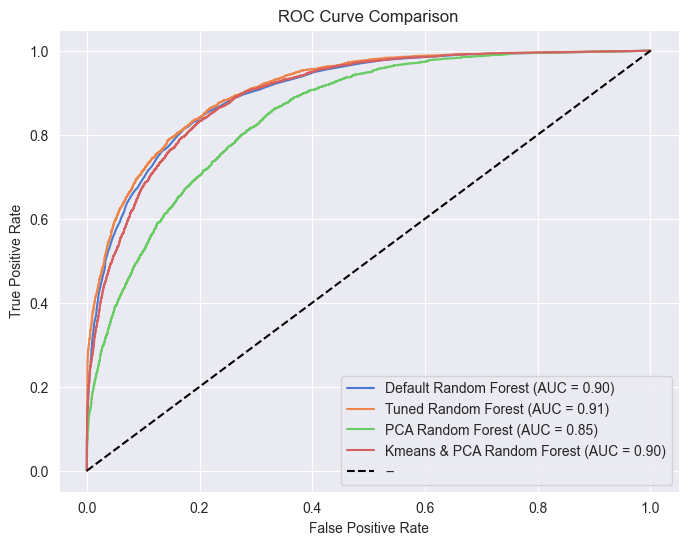

In [64]:
models = {'Default Random Forest': random_forest_model, 'Tuned Random Forest': best_random_forest_model, 'PCA Random Forest': best_rf_pca_model,  'Kmeans & PCA Random Forest': best_rf_cluster_model}

plot_roc_curve(models, X_test, y_test_num)

`We can see some improvement when we used PCA 85% and added a cluster column.`

### Ⓜ️ Wrapper Method

In [65]:
from sklearn.feature_selection import SequentialFeatureSelector

In [66]:
random_forest_wrapper= RandomForestClassifier(random_state= SEED)

In [67]:
# Instantiate the SequentialFeatureSelector
sk_sfs = SequentialFeatureSelector(random_forest_wrapper, n_features_to_select=5, direction = 'forward', cv=2, n_jobs=-1)

In [68]:
X_train_transformed= preprocessor.fit_transform(X_train)
X_test_transformed= preprocessor.transform(X_test)

In [69]:
sk_sfs.fit(X_train_transformed, y_train)

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, n_jobs=-1)

In [70]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep= sk_sfs.support_

# Only include the features selected
X_train_5= X_train_transformed.loc[:,features_to_keep]
X_test_5= X_test_transformed.loc[:,features_to_keep]

X_train_5.shape

(36592, 5)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     27841
        >50K       0.80      0.58      0.67      8751

    accuracy                           0.86     36592
   macro avg       0.84      0.77      0.79     36592
weighted avg       0.86      0.86      0.86     36592



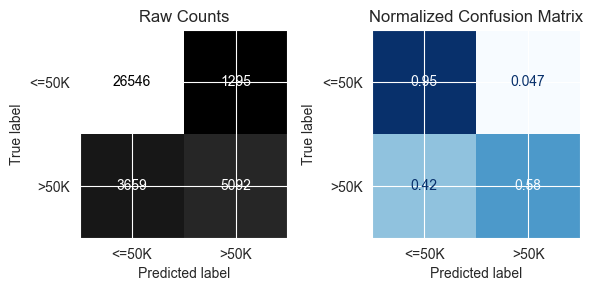


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      9268
        >50K       0.79      0.56      0.65      2930

    accuracy                           0.86     12198
   macro avg       0.83      0.76      0.78     12198
weighted avg       0.85      0.86      0.85     12198



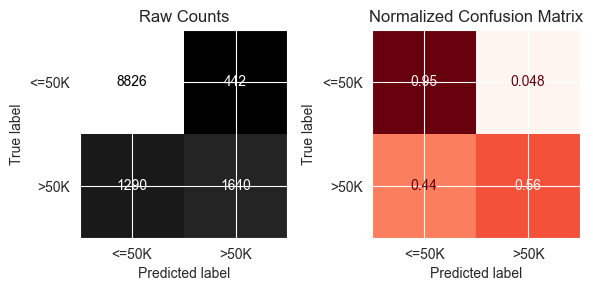

In [71]:
random_forest_wrapper= RandomForestClassifier(random_state= SEED)

random_forest_wrapper.fit(X_train_5, y_train)

evaluate_classification(random_forest_wrapper, X_train_5, y_train, X_test_5, y_test)

`We can notice from the result that this has the lowest overfit.`

### 🏆 Permutation Importance

In [72]:
r = permutation_importance(random_forest_wrapper, X_test_5, y_test, n_repeats= 5, random_state= SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [73]:
permutation_importances = pd.Series(r['importances_mean'],index= X_test_5.columns, name= 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending= False)
permutation_importances

marital-status_Married-civ-spouse    0.067683
capital-gain                         0.054616
education                            0.046319
capital-loss                         0.016445
occupation_Farming-fishing           0.001181
Name: permutation importance, dtype: float64

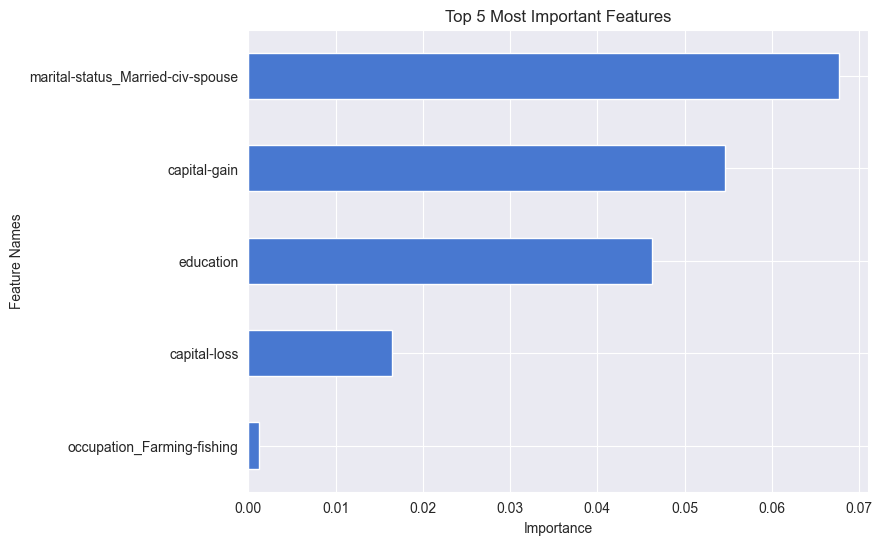

In [74]:
plot_importance(permutation_importances, top_n=5);

- The first `Permutation Importance` treats marital-status as a general feature.
- The second `Permutation Importance` drills down into the specific category of marital-status.
- The age is is not in the top 5 features in the scound `Permutation Importance`.

# Deep Learning 🌊

In [75]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    # For each metric
    for i, metric_name in enumerate(metrics):
    
        # Get the axis for the current metric
        ax = axes[i]
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [76]:
input_shape = X_train_transformed.shape[1]
input_shape

86

## 1️⃣ Simple model

In [77]:
# Build binary classification model within function
def build_model():
    # Instantiate Model 
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(10, input_dim =input_shape, activation = 'relu')) 

    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [78]:
# Call our build function to build model
model = build_model()

# Get model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
early_stop = EarlyStopping(monitor='val_accuracy', patience= 5)

In [80]:
y_train.head()

38093    <=50K
43391     >50K
3064     <=50K
45606    <=50K
2116     <=50K
Name: income, dtype: object

In [81]:
y_train= y_train.replace('<=50K', 0)
y_train= y_train.replace('>50K', 1)

y_train.head()

38093    0
43391    1
3064     0
45606    0
2116     0
Name: income, dtype: int64

In [82]:
y_test= y_test.replace('<=50K', 0)
y_test= y_test.replace('>50K', 1)

y_test.head()

3169     0
25270    1
33668    1
29925    1
11098    0
Name: income, dtype: int64

In [83]:
history = model.fit(X_train_transformed, y_train, validation_split= .2, epochs= 50, verbose= 0, callbacks = [early_stop])

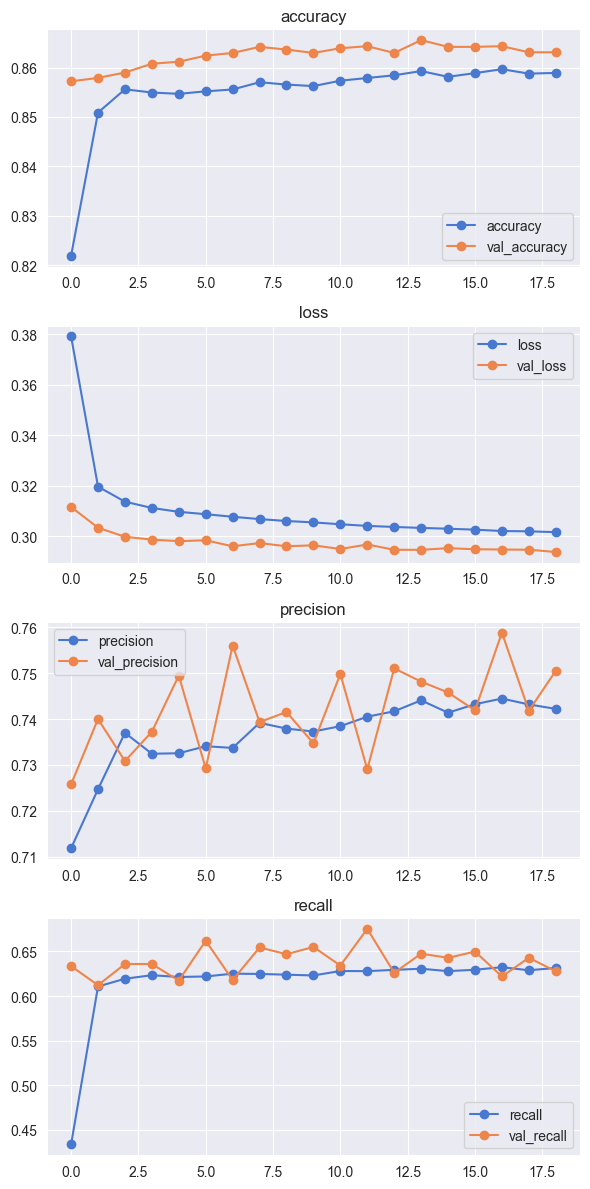

In [84]:
plot_history(history);

In [85]:
# make predictions
y_pred_train = model.predict(X_train_transformed)
# round the predictions
y_pred_train = np.round(y_pred_train)

1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [86]:
# make predictions
y_pred_test = model.predict(X_test_transformed)
# round the predictions
y_pred_test = np.round(y_pred_test)

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     27841
           1       0.75      0.63      0.68      8751

    accuracy                           0.86     36592
   macro avg       0.82      0.78      0.80     36592
weighted avg       0.86      0.86      0.86     36592



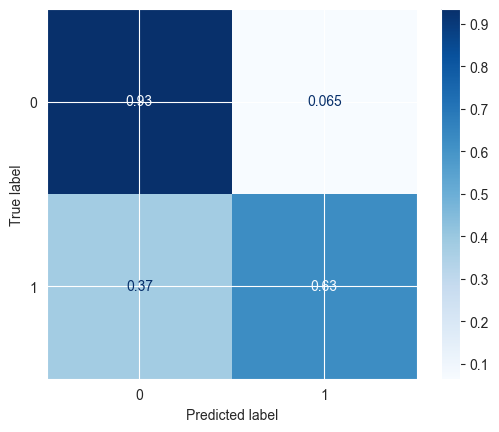

In [87]:
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize='true', cmap= heatmap_cmap);

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9268
           1       0.76      0.61      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.78      0.79     12198
weighted avg       0.85      0.86      0.85     12198



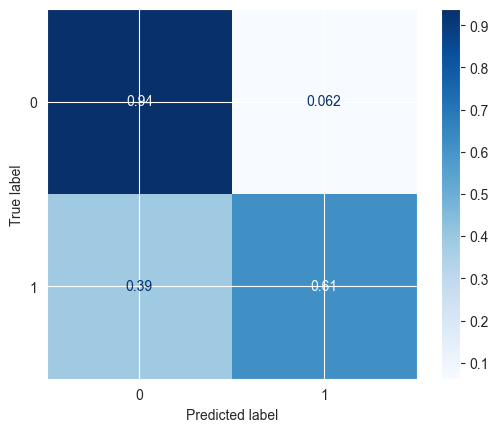

In [88]:
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize='true', cmap=heatmap_cmap);

## 2️⃣ Tuned model

In [92]:
def build_model(hp):
    # Instantiate Model 
    model = Sequential()
    # First hidden layer
    model.add(Dense(20, input_dim =input_shape, activation = 'relu'))

    model.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))

    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile Model
    # Try different optimizers
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [93]:
tuner = kt.Hyperband(build_model,
                     objective= 'val_accuracy',
                     max_epochs= 100,
                     directory= folder,
                     overwrite = True,
                     seed = SEED,
                     project_name= 'Income_tuning')

In [ ]:
epochs = 100
tuner.search(X_train_transformed, y_train,  epochs=epochs,
            validation_split=0.2, callbacks = [early_stop])

Trial 111 Complete [00h 00m 22s]
val_accuracy: 0.8594070076942444

Best val_accuracy So Far: 0.8644623756408691
Total elapsed time: 00h 36m 08s

Search: Running Trial #112

Value             |Best Value So Far |Hyperparameter
50                |20                |units
0.2               |0.3               |dropout_value
adam              |adam              |optimizer
4                 |4                 |tuner/epochs
2                 |2                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
1                 |1                 |tuner/round
0015              |0022              |tuner/trial_id

Epoch 3/4


In [ ]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

In [ ]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()